In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd /content/drive/My\ Drive/Colab Notebooks/dw_matrix

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [5]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [8]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [13]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

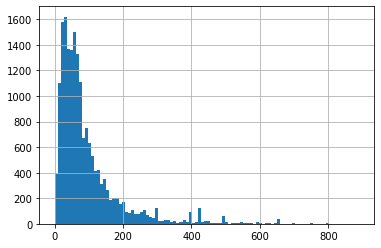

In [14]:
df['prices_amountmin'].hist(bins=100)

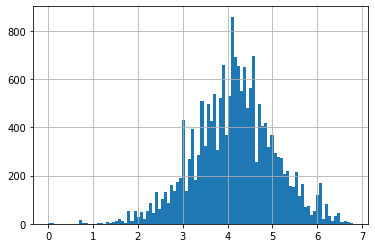

In [17]:
np.log1p(df['prices_amountmin']) .hist(bins=100)

In [18]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [19]:
np.median(y_true)

64.95

In [21]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [22]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [23]:
df.brand.value_counts()

Nike            1709
PUMA             574
Ralph Lauren     524
New Balance      361
VANS             356
                ... 
Snugpak            1
DRAGON             1
HOLIDAY            1
Wembley            1
KR3W               1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [28]:
feats = ['brand_cat']
X = df[ feats ]
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
feats = ['brand_cat']

def run_model(feats):
  X = df[ feats ]
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [30]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_list'] = df['manufacturer'].factorize()[0]

In [33]:
run_model(['manufacturer_list'])

(-63.133649278023746, 3.394307434888982)

In [35]:
run_model(['manufacturer_list', 'brand_cat'])

(-58.539304199085976, 4.3112232316154255)

In [37]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .gitignore
	deleted:    matrix_one (1)/day3.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	day4_meta.ipynb
	matrix_one/

no changes added to commit (use "git add" and/or "git commit -a")


In [38]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .gitignore
	deleted:    matrix_one (1)/day3.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	day4.ipynb
	day4_meta.ipynb
	matrix_one/

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git add day4.ipynb


In [0]:
!git add .gitignore

In [41]:
!git commit -m 'day4'


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@67555d50fc10.(none)')


In [0]:
!git config --global user.email "mirek.jozefiak@gmail.com"
!git config --global user.name "mjoze"

In [44]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/mjoze/dw_matrix
   245863a..5d22ba5  master     -> origin/master
error: Your local changes to the following files would be overwritten by merge:
	.gitignore
Please commit your changes or stash them before you merge.
Aborting


In [45]:
!git status

On branch master
Your branch and 'origin/master' have diverged,
and have 2 and 2 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   .gitignore
	new file:   day4.ipynb

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   day4.ipynb
	deleted:    matrix_one (1)/day3.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	day4_meta.ipynb
	matrix_one/



In [46]:
!git add

Nothing specified, nothing added.
Maybe you wanted to say 'git add .'?


In [47]:
!git reset

Unstaged changes after reset:
M	.gitignore
D	matrix_one (1)/day3.ipynb
